# Working with Metrica Data - setting the stage for Project 1

In [1]:
#Benjamin Abro, 40122906
#Please note code must be run from top to bottom to avoid errors
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
import numpy as np

import matplotlib.pyplot as plt
import os

In [2]:
# Import some classes that I shamelessly borrowed from https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking
import Metrica_IO as mio
import Metrica_Viz as mviz

In [3]:
# set up initial path to data
DATADIR = os.path.join("sample-data","data")
game_id = 2 # let's look at sample match 2


## Event Data

In [4]:
# read in the event data
events = mio.read_event_data(DATADIR,game_id)

In [5]:
# count the number of each event type in the data
print( events['Type'].value_counts() )

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64


In [6]:
# Bit of housekeeping: unit conversion from metric data units to meters
events = mio.to_metric_coordinates(events)

In [7]:
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,4.24,-18.36,-22.26,17.68
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,-20.14,13.60,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,-19.08,13.60,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,-16.96,12.24,NaN,NaN


In [8]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

# Frequency of each event type by team
home_events['Type'].value_counts()
away_events['Type'].value_counts()

PASS              421
CHALLENGE         151
BALL LOST         113
RECOVERY          113
SET PIECE          46
BALL OUT           22
FAULT RECEIVED     11
SHOT               11
CARD                3
Name: Type, dtype: int64

In [30]:
away_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,Away,CARD,YELLOW,2,138445,5537.80,138445,5537.80,Player17,NaN,NaN,NaN,NaN,NaN
1928,Away,RECOVERY,SAVED,2,139926,5597.04,139926,5597.04,Player25,NaN,51.94,-1.36,NaN,NaN
1929,Away,PASS,NaN,2,140010,5600.40,140058,5602.32,Player25,Player21,39.22,-0.00,14.84,-20.40
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,4.24,-18.36,-22.26,17.68


## Tracking Data

In [10]:
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

# # plot player positions at ,atckick-off
# KO_Frame = events.loc[0]['Start Frame']
# fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )



Reading team: home
Reading team: away


In [11]:
tracking_away
## It does not really make sense why the Home_5 starts off with negative x value 

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,43.68366,1.14852,-1.03032,37.40000,-1.15434,3.54416,10.37528,-5.07824,-7.39138,-7.52964,-10.17388,-2.99676,-25.87036,7.87100,-3.44394,-37.40000,NaN,NaN,-24.53370,-8.0546,-14.03440,25.50272,-5.33604,5.73104,NaN,NaN
141153,2,5646.12,43.66246,1.14852,-1.03032,37.40000,-1.17236,3.56252,10.35302,-5.10612,-7.39032,-7.52216,-10.17494,-3.02532,-25.87036,7.87100,-3.40260,-37.40000,NaN,NaN,-24.53370,-8.0546,-14.03440,25.50272,-5.31802,5.74600,NaN,NaN
141154,2,5646.16,43.63808,1.14852,-1.03032,37.40000,-1.17872,3.61488,10.34878,-5.13400,-7.39032,-7.55276,-10.17812,-3.05320,-25.87036,7.87100,-3.37292,-37.40000,NaN,NaN,-24.53370,-8.0546,-14.03440,25.50272,-5.30318,5.79020,NaN,NaN


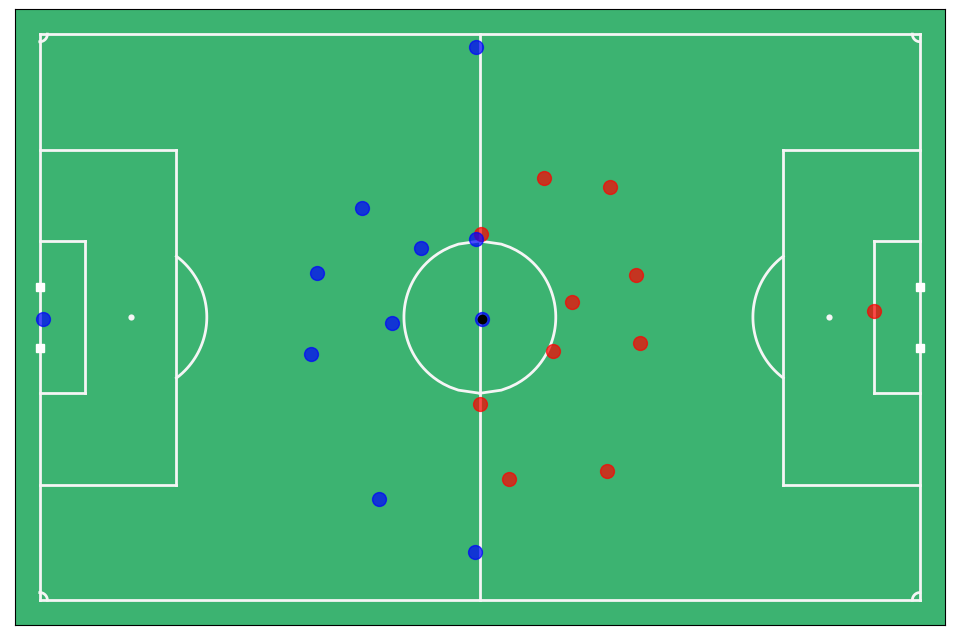

In [12]:
# plot player positions at ckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )


## Let's examine some passes

In [13]:
passes = events.loc[events["Type"]=="PASS"]

In [14]:
passes["Subtype"].unique()

array([nan, 'HEAD', 'CROSS', 'DEEP BALL', 'GOAL KICK',
       'HEAD-INTERCEPTION-CLEARANCE'], dtype=object)

In [15]:
passes

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
5,Away,PASS,NaN,1,395,15.80,423,16.92,Player16,Player15,-25.44,-10.88,-24.38,-27.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,Home,PASS,NaN,2,137209,5488.36,137221,5488.84,Player1,Player6,-9.54,12.24,-4.24,4.76
1915,Home,PASS,NaN,2,137263,5490.52,137303,5492.12,Player6,Player1,-4.24,12.24,-12.72,21.76
1916,Home,PASS,NaN,2,137303,5492.12,137332,5493.28,Player1,Player5,-12.72,21.76,-1.06,26.52
1917,Home,PASS,NaN,2,137334,5493.36,137359,5494.36,Player5,Player1,-1.06,26.52,-15.90,26.52


(<Figure size 1200x800 with 1 Axes>, <AxesSubplot:>)

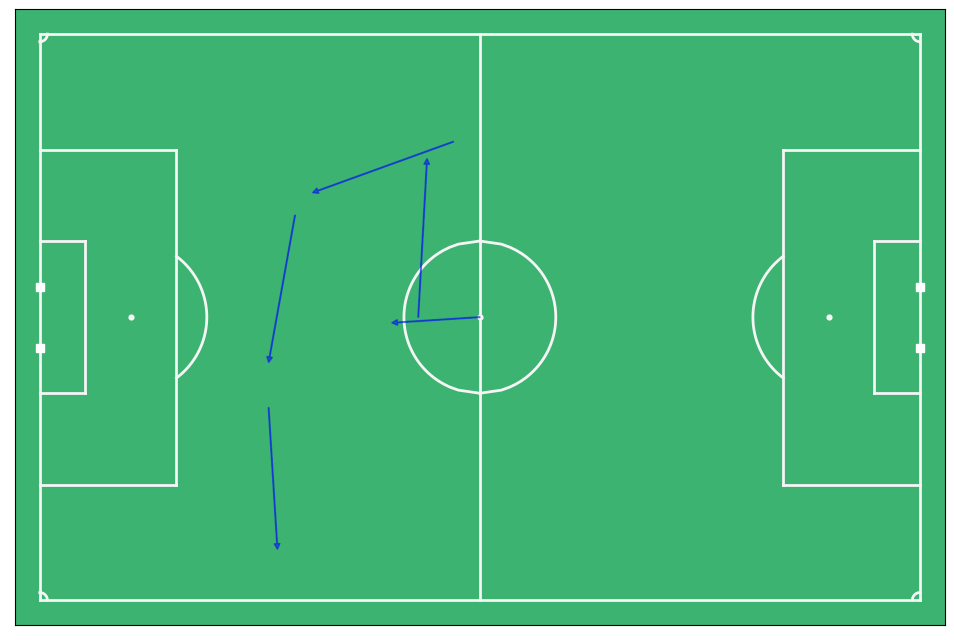

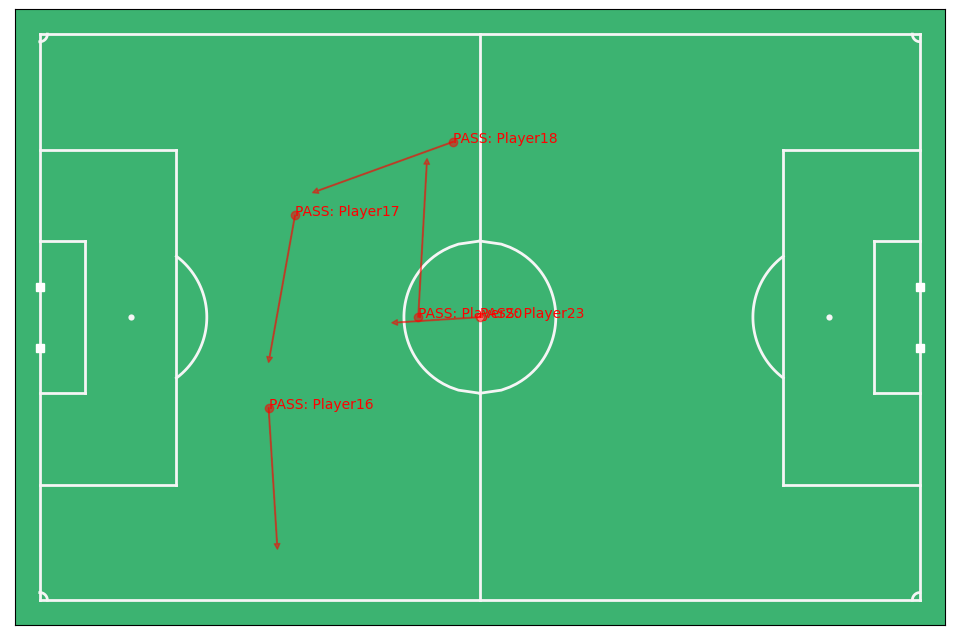

In [16]:
fig, ax= mviz.plot_pitch()


# Two ways to plot the first 4 passes:
for index, row in passes.iterrows():
    if index > 5: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
    
# That's essentially all that's in the plot_events function
mviz.plot_events( passes.iloc[0:5], indicators = ['Marker','Arrow'], annotate=True )

Text(-9.540000000000003, 12.24, '')

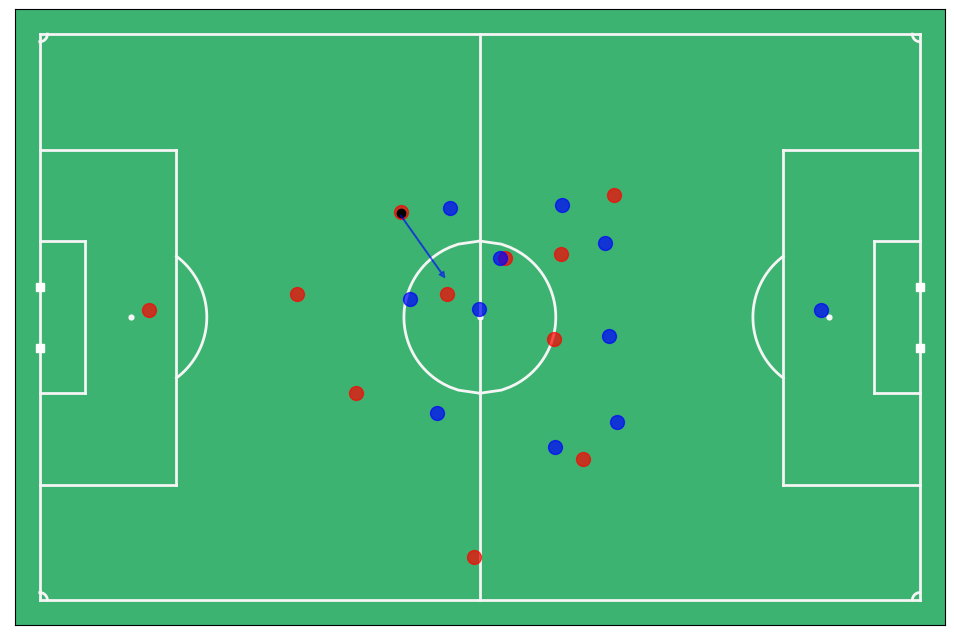

In [17]:
# We can also plot a single pass and all the positions of each team
pass_of_interest_loc = 1914
pass_frame_number = passes.loc[pass_of_interest_loc]["Start Frame"]

fig, ax = mviz.plot_frame( tracking_home.loc[pass_frame_number], tracking_away.loc[pass_frame_number] )
ax.annotate("", xy=passes.loc[pass_of_interest_loc][['End X', 'End Y']], xytext=passes.loc[pass_of_interest_loc][['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
## to add to plot ax.plot()

Interesting, nan passes seem to be a standard pass. You could filter on a specific type, or use them all.

Pseudocode to calculate a naive "Impact Factor"

For every pass:

        Get the position it started at and the position it ended at in the X-direction

        Get the X-coordinate of all opposition players
        
        Count how many opposition players the pass "outplays"
        Add that new Impact Factor score to the dataframe for that pass.
    

Extra Points go to fast implementations :)
    

In [18]:
## Project 1 Benjamin Abro, 40122906
## We are analysing passes made by the away team in game 2 of the metrica data. 
#First to create the impact factor discribed in the psydo code
passes = away_events.loc[away_events["Type"]=="PASS"]    #Only looking for away team passes
pass_start=passes["Start Time [s]"]   #Start time of passes
pass_end=passes["End Time [s]"]    #End time of passes
start_x = tracking_home[tracking_home['Time [s]'].isin(pass_start)] #Starting positions of players at pass
start_x = start_x.drop('Time [s]', axis = 1) #Starting positions of players at pass
start_x = start_x.drop('Period', axis = 1) #Starting positions of players at pass
end_x = tracking_home[tracking_home['Time [s]'].isin(pass_end)] #Ending positions of players at pass
end_x = end_x.drop('Time [s]', axis = 1) #Ending positions of players at pass
end_x = end_x.drop('Period', axis = 1) #Ending positions of players at pass
ball_start=start_x['ball_x']    #Starting position of ball before pass
ball_end=end_x['ball_x']        #Ending posion of ball afterpass
#need to calculate the number of players behind ball before each pass
#subtracting the starting ball position from the starting players positions
start_x['Home_1_x']=start_x['Home_1_x']-start_x['ball_x']
start_x['Home_2_x']=start_x['Home_2_x']-start_x['ball_x']
start_x['Home_3_x']=start_x['Home_3_x']-start_x['ball_x']
start_x['Home_4_x']=start_x['Home_4_x']-start_x['ball_x']
start_x['Home_5_x']=start_x['Home_5_x']-start_x['ball_x']
start_x['Home_6_x']=start_x['Home_6_x']-start_x['ball_x']
start_x['Home_7_x']=start_x['Home_7_x']-start_x['ball_x']
start_x['Home_8_x']=start_x['Home_8_x']-start_x['ball_x']
start_x['Home_9_x']=start_x['Home_9_x']-start_x['ball_x']
start_x['Home_10_x']=start_x['Home_10_x']-start_x['ball_x']
start_x['Home_11_x']=start_x['Home_11_x']-start_x['ball_x']
start_x['Home_12_x']=start_x['Home_12_x']-start_x['ball_x']
start_x['Home_13_x']=start_x['Home_13_x']-start_x['ball_x']
start_x['Home_14_x']=start_x['Home_14_x']-start_x['ball_x']
#dropping all the y, and ball values
start_x=start_x.drop('Home_1_y',axis=1)
start_x=start_x.drop('Home_2_y',axis=1)
start_x=start_x.drop('Home_3_y',axis=1)
start_x=start_x.drop('Home_4_y',axis=1)
start_x=start_x.drop('Home_5_y',axis=1)
start_x=start_x.drop('Home_6_y',axis=1)
start_x=start_x.drop('Home_7_y',axis=1)
start_x=start_x.drop('Home_8_y',axis=1)
start_x=start_x.drop('Home_9_y',axis=1)
start_x=start_x.drop('Home_10_y',axis=1)
start_x=start_x.drop('Home_11_y',axis=1)
start_x=start_x.drop('Home_12_y',axis=1)
start_x=start_x.drop('Home_13_y',axis=1)
start_x=start_x.drop('Home_14_y',axis=1)
start_x=start_x.drop('ball_y',axis=1)
start_x=start_x.drop('ball_x',axis=1)
#Converting the values into a binary where each value is 1 if a player is behind the ball at the start of the pass
# and 0 if a player is infront of a ball before the pass
start_x[start_x < 0] = 0
start_x[start_x > 0] = 1
start_x
#doing the same for the end of the pass
#subtracting the ending ball position from the ending players positions
end_x['Home_1_x']=end_x['Home_1_x']-end_x['ball_x']
end_x['Home_2_x']=end_x['Home_2_x']-end_x['ball_x']
end_x['Home_3_x']=end_x['Home_3_x']-end_x['ball_x']
end_x['Home_4_x']=end_x['Home_4_x']-end_x['ball_x']
end_x['Home_5_x']=end_x['Home_5_x']-end_x['ball_x']
end_x['Home_6_x']=end_x['Home_6_x']-end_x['ball_x']
end_x['Home_7_x']=end_x['Home_7_x']-end_x['ball_x']
end_x['Home_8_x']=end_x['Home_8_x']-end_x['ball_x']
end_x['Home_9_x']=end_x['Home_9_x']-end_x['ball_x']
end_x['Home_10_x']=end_x['Home_10_x']-end_x['ball_x']
end_x['Home_11_x']=end_x['Home_11_x']-end_x['ball_x']
end_x['Home_12_x']=end_x['Home_12_x']-end_x['ball_x']
end_x['Home_13_x']=end_x['Home_13_x']-end_x['ball_x']
end_x['Home_14_x']=end_x['Home_14_x']-end_x['ball_x']
#dropping all the y, and ball values
end_x=end_x.drop('Home_1_y',axis=1)
end_x=end_x.drop('Home_2_y',axis=1)
end_x=end_x.drop('Home_3_y',axis=1)
end_x=end_x.drop('Home_4_y',axis=1)
end_x=end_x.drop('Home_5_y',axis=1)
end_x=end_x.drop('Home_6_y',axis=1)
end_x=end_x.drop('Home_7_y',axis=1)
end_x=end_x.drop('Home_8_y',axis=1)
end_x=end_x.drop('Home_9_y',axis=1)
end_x=end_x.drop('Home_10_y',axis=1)
end_x=end_x.drop('Home_11_y',axis=1)
end_x=end_x.drop('Home_12_y',axis=1)
end_x=end_x.drop('Home_13_y',axis=1)
end_x=end_x.drop('Home_14_y',axis=1)
end_x=end_x.drop('ball_y',axis=1)
end_x=end_x.drop('ball_x',axis=1)
#Converting the values into a binary where each value is 1 if a player is behind the ball at the end of the pass
# and 0 if a player is infront of a ball before the pass
end_x[end_x < 0] = 0
end_x[end_x > 0] = 1
end_x
#Thus we now have binaries of whether a player was behind or infront of the ball before and after a pass and can use that to
#Calculate the impact factor of each pass
start_x.reset_index(inplace=True) #resetting index
end_x.reset_index(inplace=True) #resetting index 
impact = end_x.subtract(start_x, fill_value= None)
#in the dataframe impact a 1 represents a player being goalside of the ball before the pass 
#and the ball being goalside of the player afterwards
#a 0 represents the player being goalside both before and after a pass
# and a -1 represents the ball being goalside of the player before the pass and the player goalside of the ball after
impact[impact <0 ] = 0 #get rid of the negatives as they are irrelevent to our impact factor
impact=impact.drop('Frame',axis=1) # Dropping a column as it will impact our next calculation
impact.loc[:,"Total"] = impact.sum(numeric_only=True, axis = 1)#adding a new column which is our impact score
impact=impact['Total'] # Deleting the rest of the columns of the dataset
# Thus we have our impact score for each pass
impact

0      2.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
416    3.0
417    2.0
418    3.0
419    2.0
420    2.0
Name: Total, Length: 421, dtype: float64

In [19]:
## Creating a modified impact score
## Now we will create an improved version of the impact factor
## The original impact factor is the sum(n) where n is the number of players who were "outplayed" by the pass
## We will now create a new impact factor that is the sum(n/m) where n is the same as before
## and m is the number of players that are still goalside of the ball after the pass
## This is a much improved version of the original impact factor as pass that gets behind the last defender is much more impactful
## Than a pass that gets behind the most far forward player
## To do this we must calculate the number of players still goalside of the ball after the pass 
##and divide the original impact factor by this value
## We can do this quite simply by summing a modified version of our variable end_x and then dividing our impact factor by this value
end_x=end_x.drop('Frame',axis=1) # Dropping a column as it will impact our next calculation
end_x.loc[:,"Total"] = end_x.sum(numeric_only=True, axis = 1) + 1 ## Adding one as to avoid dividing by zero
end_x = end_x['Total']
modified_impact_factor = impact / end_x
modified_impact_factor


0      0.166667
1      0.000000
2      0.083333
3      0.000000
4      0.000000
         ...   
416    0.750000
417    0.500000
418    0.375000
419    0.222222
420    0.666667
Name: Total, Length: 421, dtype: float64

In [28]:


## Now that our new modified impact factor has been created we can do statistical analysis on it
## First we need to associate each impact factor to a pass
passes = away_events.loc[away_events["Type"]=="PASS"]    #Only looking for Away team passes
passes.reset_index(inplace=True) ##resetting index on passes dataframe
passes=passes['From'] 
passes= pd.DataFrame(passes) #The passes variable is now a dataframe that indicates which player made each pass
passes.loc[:,"Impact factor"] = modified_impact_factor # adding the impact factor to the passes
passes
## We have now created a variable that matches denotes, the pass #(starting from 0), the impact factor of that pass,
## and the player who made that pass.
## now lets sum the total impact each players pass made
player_15 = passes[passes['From'] == "Player15"]
player_16 = passes[passes['From'] == "Player16"]
player_17 = passes[passes['From'] == "Player17"]
player_18 = passes[passes['From'] == "Player18"]
player_19 = passes[passes['From'] == "Player19"]
player_20 = passes[passes['From'] == "Player20"]
player_21 = passes[passes['From'] == "Player21"]
player_22 = passes[passes['From'] == "Player22"]
player_23 = passes[passes['From'] == "Player23"]
player_24 = passes[passes['From'] == "Player24"]
player_25 = passes[passes['From'] == "Player25"]
player_26 = passes[passes['From'] == "Player26"]
player_15 = player_15.drop('From',axis=1)
player_16 = player_16.drop('From',axis=1)
player_17 = player_17.drop('From',axis=1)
player_18 = player_18.drop('From',axis=1)
player_19 = player_19.drop('From',axis=1)
player_20 = player_20.drop('From',axis=1)
player_21 = player_21.drop('From',axis=1)
player_22 = player_22.drop('From',axis=1)
player_23 = player_23.drop('From',axis=1)
player_24 = player_24.drop('From',axis=1)
player_25 = player_25.drop('From',axis=1)
player_26 = player_26.drop('From',axis=1)
player_15.loc["Total impact"] = player_15.sum(numeric_only=True, axis = 0)
player_16.loc["Total impact"] = player_16.sum(numeric_only=True, axis = 0)
player_17.loc["Total impact"] = player_17.sum(numeric_only=True, axis = 0)
player_18.loc["Total impact"] = player_18.sum(numeric_only=True, axis = 0)
player_19.loc["Total impact"] = player_19.sum(numeric_only=True, axis = 0)
player_20.loc["Total impact"] = player_20.sum(numeric_only=True, axis = 0)
player_21.loc["Total impact"] = player_21.sum(numeric_only=True, axis = 0)
player_22.loc["Total impact"] = player_22.sum(numeric_only=True, axis = 0)
player_23.loc["Total impact"] = player_23.sum(numeric_only=True, axis = 0)
player_24.loc["Total impact"] = player_24.sum(numeric_only=True, axis = 0)
player_25.loc["Total impact"] = player_25.sum(numeric_only=True, axis = 0)
player_26.loc["Total impact"] = player_26.sum(numeric_only=True, axis = 0)
print("The total impact scores for players 15 is")
print(player_15.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 15 is")
print(player_15.mean(numeric_only=True, axis = 0))
print("The total impact scores for players 16 is")
print(player_16.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 16 is")
print(player_16.mean(numeric_only=True, axis = 0))
print("The total impact scores for players 17 is")
print(player_17.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 17 is")
print(player_17.mean(numeric_only=True, axis = 0))
print("The total impact scores for players 18 is")
print(player_18.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 18 is")
print(player_18.mean(numeric_only=True, axis = 0))
print("The total impact scores for players 19 is")
print(player_19.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 19 is")
print(player_19.mean(numeric_only=True, axis = 0))
print("The total impact scores for players 20 is")
print(player_20.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 20 is")
print(player_20.mean(numeric_only=True, axis = 0))
print("The total impact scores for players 21 is")
print(player_21.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 21 is")
print(player_21.mean(numeric_only=True, axis = 0))
print("The total impact scores for players 22 is")
print(player_22.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 22 is")
print(player_22.mean(numeric_only=True, axis = 0))
print("The total impact scores for players 23 is")
print(player_23.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 23 is")
print(player_23.mean(numeric_only=True, axis = 0))
print("The total impact scores for players 24 is")
print(player_24.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 24 is")
print(player_24.mean(numeric_only=True, axis = 0))
print("The total impact scores for players 25 is")
print(player_25.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 25 is")
print(player_25.mean(numeric_only=True, axis = 0))
print("The total impact scores for players 26 is")
print(player_26.sum(numeric_only=True, axis = 0))
print("The average impact scores for players 26 is")
print(player_26.mean(numeric_only=True, axis = 0))
## Thus we can see that player  has the highest average impact score
## and player 17 has the highest total impact score




The total impact scores for players 15 is
Impact factor    12.961905
dtype: float64
The average impact scores for players 15 is
Impact factor    0.216032
dtype: float64
The total impact scores for players 16 is
Impact factor    12.495238
dtype: float64
The average impact scores for players 16 is
Impact factor    0.227186
dtype: float64
The total impact scores for players 17 is
Impact factor    13.428571
dtype: float64
The average impact scores for players 17 is
Impact factor    0.279762
dtype: float64
The total impact scores for players 18 is
Impact factor    9.74329
dtype: float64
The average impact scores for players 18 is
Impact factor    0.187371
dtype: float64
The total impact scores for players 19 is
Impact factor    9.454762
dtype: float64
The average impact scores for players 19 is
Impact factor    0.33767
dtype: float64
The total impact scores for players 20 is
Impact factor    13.181169
dtype: float64
The average impact scores for players 20 is
Impact factor    0.248701
dtype

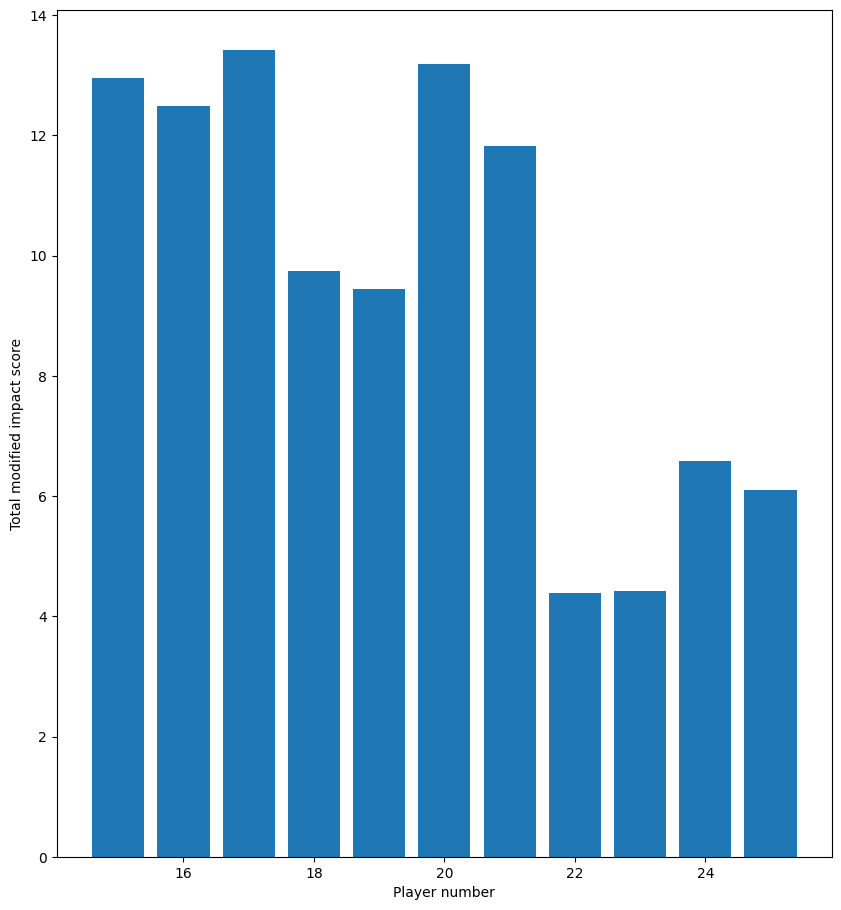

In [21]:
##STATISTICAL ANALYSIS
## To perform statistical analysis on the modified impact factor we must first convert the impact scores into a data frame
##https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
df = {'Player number': [15,16,17,18,19,20,21,22,23,24,25], 'Total modified impact score': [12.96, 12.49,13.42,9.74,9.45,13.18,11.83,4.38,4.42,6.58,6.1], 'Average modifed impact score':[0.216032,0.227186,0.279762,0.187371,0.33767,0.248701,0.219243,0.219167,0.201171,0.329372,0.406667]}
df = pd.DataFrame(df)
#player 26 has been removed from df as no data was collected. 
#Note: Player 25 is the goalie
plt.figure(figsize=(10, 11))
x = df['Player number']
x = pd.DataFrame(x)
y =  df['Total modified impact score']
y = pd.DataFrame(y)
plt.bar(df['Player number'], df['Total modified impact score']) ## plot of each players Total impact score
plt.xlabel('Player number')
plt.ylabel('Total modified impact score') ## Labels
plt.savefig("totmodifiedimpactscorebarplot.jpg")
##https://matplotlib.org/stable/tutorials/introductory/pyplot.html

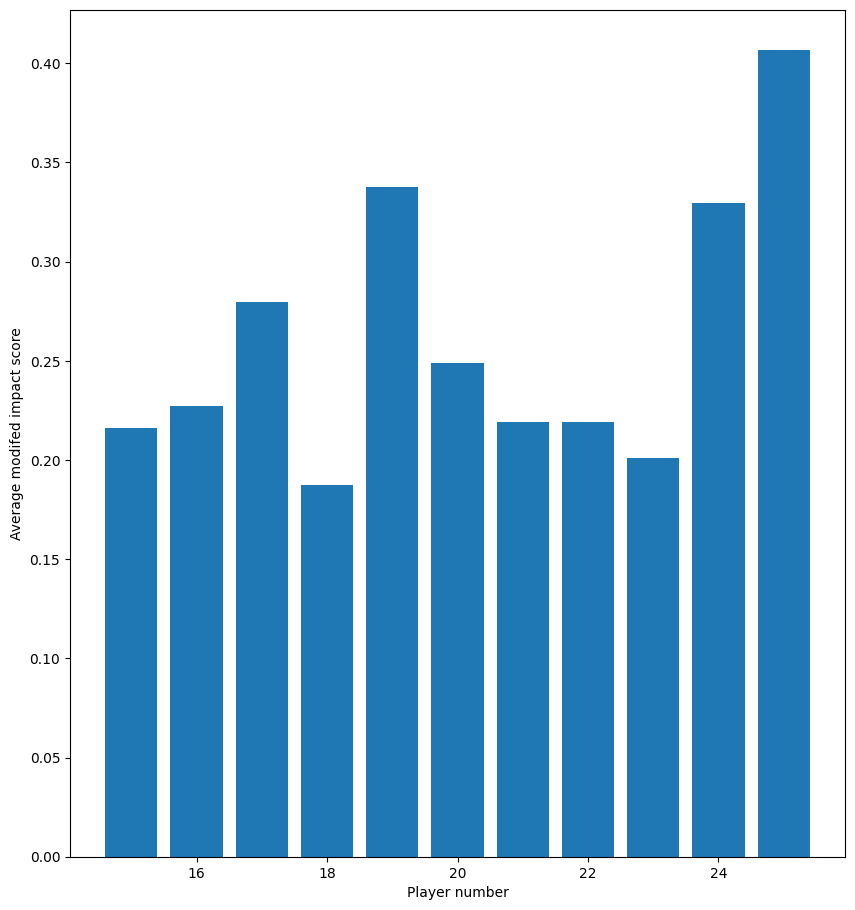

In [22]:
## Now lets do a bar plot of the average impact score
plt.figure(figsize=(10, 11))
x = df['Player number']
x = pd.DataFrame(x)
y =  df['Average modifed impact score']
y = pd.DataFrame(y)
plt.bar(df['Player number'], df['Average modifed impact score']) ## plot of each players Total impact score
plt.xlabel('Player number')
plt.ylabel('Average modifed impact score') ## Labels
plt.savefig("avgmodifiedimpactscorebarplot.jpg")
## It is interesting to note that the plots of the average and total impact scores are very different

In [23]:
df

,Player number,Total modified impact score,Average modifed impact score
0,15,12.96,0.216032
1,16,12.49,0.227186
2,17,13.42,0.279762
3,18,9.74,0.187371
4,19,9.45,0.337670
5,20,13.18,0.248701
6,21,11.83,0.219243
7,22,4.38,0.219167
8,23,4.42,0.201171
9,24,6.58,0.329372


In [24]:
###Now lets analyize some passes with high impact score
passes['Impact factor'].astype(str).astype(float).nlargest(2) 
### Thus we can see the 344th, and the 411th pass are the three passses with the largest impact factor
## now we can plot these passes. 

343    0.833333
411    0.833333
Name: Impact factor, dtype: float64

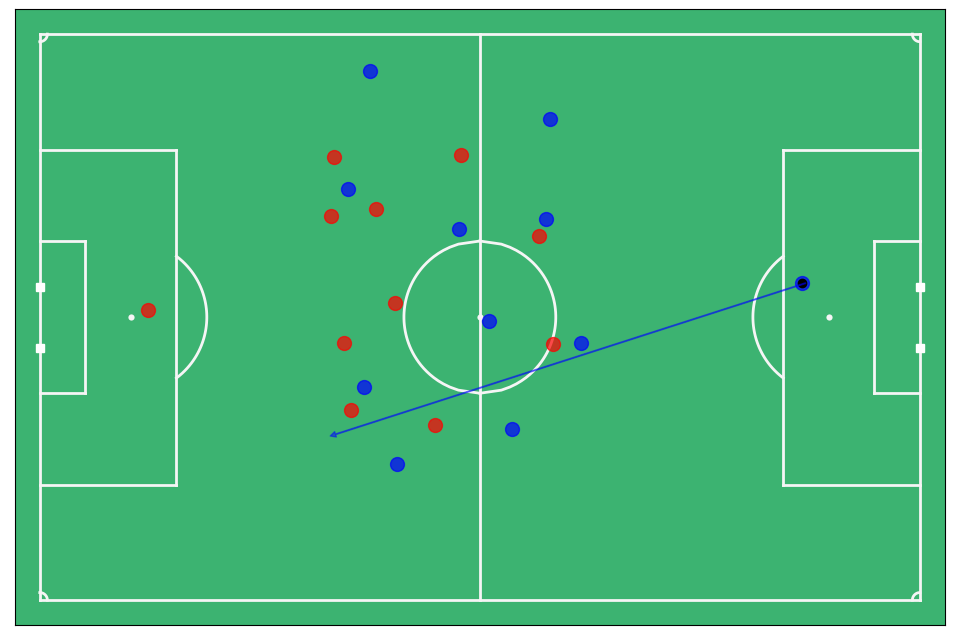

In [25]:
passes = away_events.loc[away_events["Type"]=="PASS"] ### Making passes only the away passes
passes.reset_index(inplace=True) ## Resetting index to apply searching function
pass_of_interest_loc = 343
pass_frame_number = passes.loc[pass_of_interest_loc]["Start Frame"]

fig, ax = mviz.plot_frame( tracking_home.loc[pass_frame_number], tracking_away.loc[pass_frame_number] )
ax.annotate("", xy=passes.loc[pass_of_interest_loc][['End X', 'End Y']], xytext=passes.loc[pass_of_interest_loc][['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
## to add to plot ax.plot()
plt.savefig("plotofpass#344.jpg")

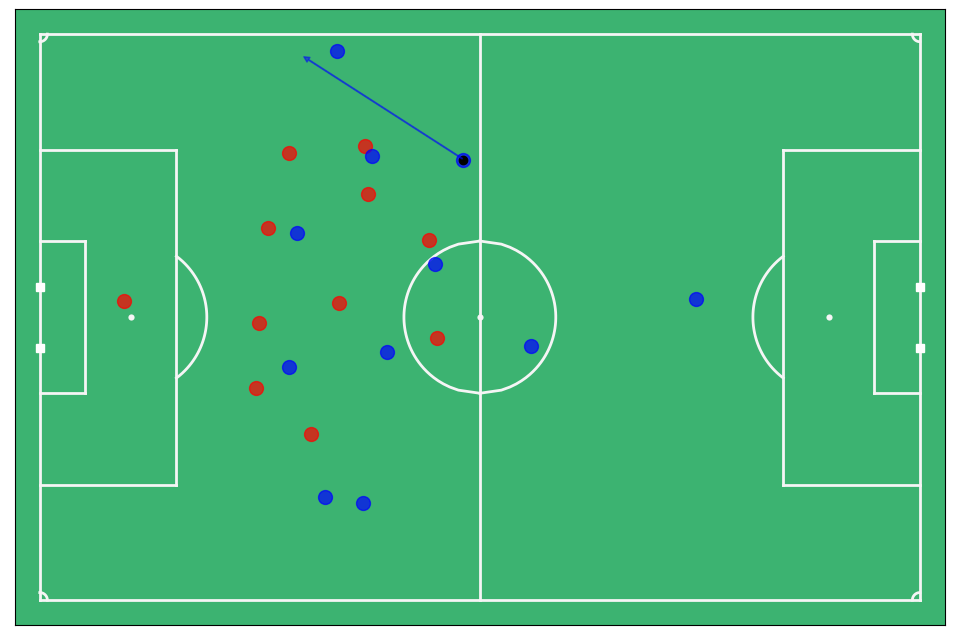

In [26]:
passes = away_events.loc[away_events["Type"]=="PASS"] ### Making passes only the away passes
passes.reset_index(inplace=True) ## Resetting index to apply searching function
pass_of_interest_loc = 411
pass_frame_number = passes.loc[pass_of_interest_loc]["Start Frame"]

fig, ax = mviz.plot_frame( tracking_home.loc[pass_frame_number], tracking_away.loc[pass_frame_number] )
ax.annotate("", xy=passes.loc[pass_of_interest_loc][['End X', 'End Y']], xytext=passes.loc[pass_of_interest_loc][['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
## to add to plot ax.plot()
plt.savefig("plotofpass#411.jpg")